In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_stories = pd.read_csv('stories.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 

print(processedData)

['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like', 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly', 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet acted

In [11]:

df_vectors = pd.read_csv('INPUT-sentimentWithAPI.csv', ',') # change this file name §§§§
df_vectors = df_vectors.drop(['Unnamed: 0'], axis=1)
df_vectors = df_vectors.drop(['Story'], axis=1)
# df_vectors = df_vectors.drop(['disgust'], axis=1)
# df_vectors = df_vectors.drop(['polarity'], axis=1)
# df_vectors = df_vectors.drop(['subjectivity'], axis=1)
# df_vectors = df_vectors.drop(['compound'], axis=1)
# df_vectors = df_vectors.drop(['neg'], axis=1)
# df_vectors = df_vectors.drop(['pos'], axis=1)

df_vectors.head()
# df_vectors.keys()
# print(df_vectors.shape)GloVe_skipgram


,joy,sadness,surprise,fear,anger,disgust
0,0.000000,0.006450,0.000000,0.026451,0.042257,0.064066
1,0.000000,0.030660,0.182379,0.027048,0.038999,0.000000
2,0.001568,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.107202,0.032976,0.155422,0.180976,0.184285
4,0.000000,0.154392,0.033092,0.276866,0.098636,0.090113


In [12]:
rows, cols = df_vectors.shape

print(rows)
print(cols)

counter = 0

allVectors = []

for row in range(rows):
  vector = []
  for emotion in ['joy',	'sadness',	'surprise',	'fear',	'anger', 'disgust']:
    vector.append(df_vectors[emotion][row])
  allVectors.append(vector)

439
6


In [13]:
from sklearn.preprocessing import normalize
data_scaled = allVectors
# normalize(df_vectors)
# data_scaled = pd.DataFrame(data_scaled, columns= df_vectors.columns)
# data_scaled.head()

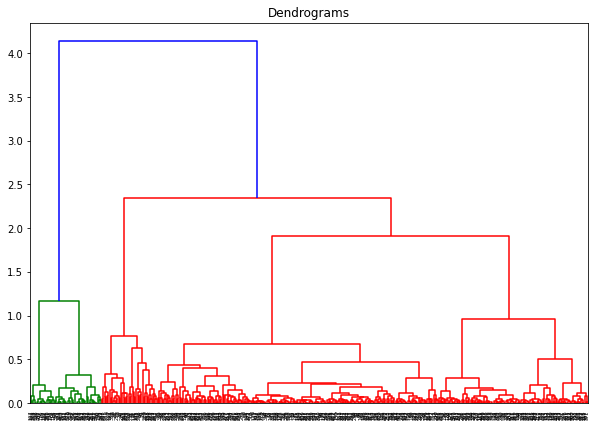

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [15]:
#TRYING Three CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)
labels
print(len(labels))

439


In [16]:
labels
import csv
with open('6_sentiment_HCA_clusters_3_withoutPCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

[0 0 0 2 2 2 2 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 2
 0 2 0 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 2 1 0 0 2 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 2 2 0
 0 0 0 2 0 2 0 2 0 2 0 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 2 0
 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 1 0 0 0 2 0 2 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 2 0]
0.5260190667782916


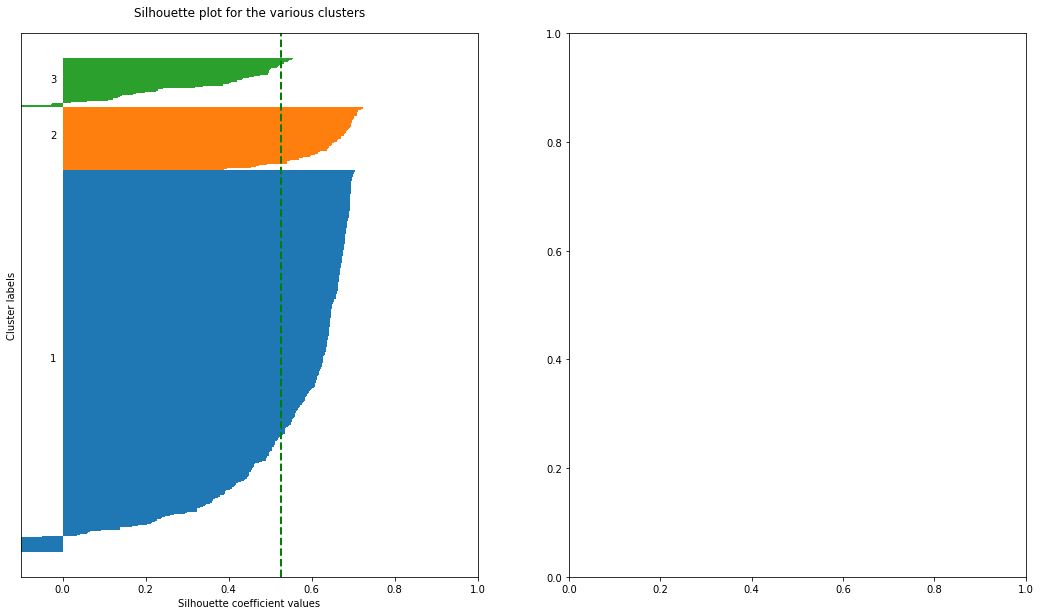

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_coefficients = []

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 10)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)
print(labels)

# Get silhouette samples
silhouette_vals = silhouette_samples(allVectors, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
  cluster_silhouette_vals = silhouette_vals[labels == cluster]
  cluster_silhouette_vals.sort()
  y_upper += len(cluster_silhouette_vals)
  ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
  ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
  y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);
print(avg_score)

In [18]:
from sklearn.metrics import calinski_harabasz_score

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)

calinski_harabasz_val = calinski_harabasz_score(allVectors, labels)

print(calinski_harabasz_val)

446.7319507393843


In [19]:
from sklearn.metrics import davies_bouldin_score

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)

davies_bouldin_val = davies_bouldin_score(allVectors, labels)

print(davies_bouldin_val)

0.7422167967641617
